In [2]:
import numpy as np

import pandas as pd

from datetime import date, timedelta

from pandas.plotting import register_matplotlib_converters #function adds plotting functions for calender dates

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential



In [3]:
from keras.layers import LSTM, Dense
import pandas_datareader as webreader
import matplotlib.dates as mdates

In [4]:
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2010-01-01'

stockname = 'S&P500'
symbol = '^GSPC'

In [5]:
date_today, today

('2021-07-03', datetime.date(2021, 7, 3))

In [11]:
df = webreader.DataReader(symbol, start = date_start, end = date_today, data_source = "yahoo")

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/^GSPC/history?period1=1262314800&period2=1625363999&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [7]:
df.tail()

NameError: name 'df' is not defined

<AxesSubplot:xlabel='Date'>

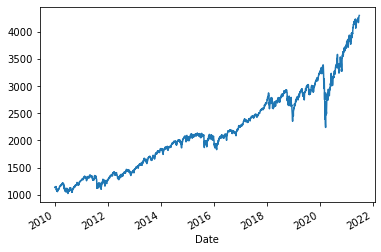

In [17]:
df['Close'].plot()

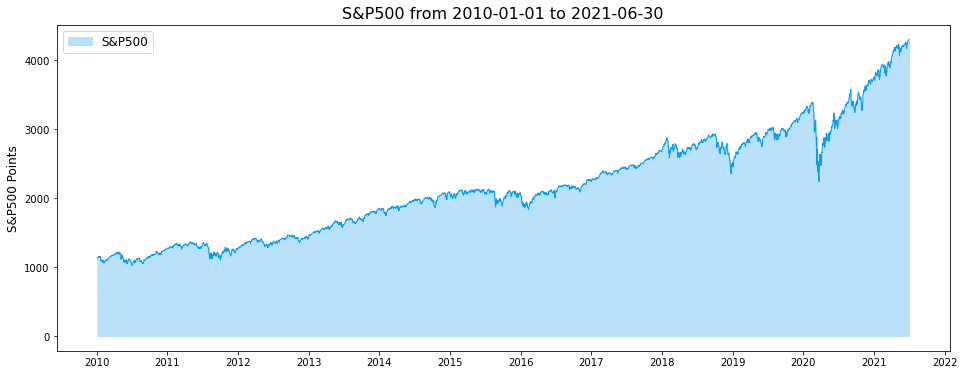

In [27]:
register_matplotlib_converters()
years = mdates.YearLocator()
fig, ax1 = plt.subplots(figsize = (16, 6))
ax1.xaxis.set_major_locator(years)
x = df.index
y = df['Close']
ax1.fill_between(x, 0, y, color = '#b9e1fa')
ax1.legend([stockname], fontsize = 12)
plt.title(stockname + ' from ' + date_start + ' to ' + date_today, fontsize = 16)
plt.plot(y, color = '#039dfc', label = 'S&P500', linewidth = 1.0)
plt.ylabel('S&P500 Points', fontsize = 12)
plt.show()

In [29]:
import math

In [30]:
data = df.filter(['Close'])
npdataset = data.values

training_data_length = math.ceil(len(npdataset)*0.8)

In [49]:
npdataset.shape

(2893, 1)

In [51]:
training_data_length

2315

In [55]:
math.ceil(7)

7

In [32]:
mmscaler = MinMaxScaler(feature_range = (0,1))
scaled_data = mmscaler.fit_transform(npdataset)

In [41]:
train_data = scaled_data[0:training_data_length, :]

In [57]:
len(train_data)

2315

In [62]:
#train_data[0:100, 0]

In [63]:
#train_data[1:101, 0]

In [66]:
x_train = []
y_train = []

trainingdatasize = len(train_data)
for i in range(100, trainingdatasize):
    x_train.append(train_data[i-100: i, 0])
    y_train.append(train_data[i, 0])
    

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)
print(y_train.shape)

(2215, 100, 1)
(2215,)


In [68]:
model = Sequential()

model.add(LSTM(100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences = False))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [69]:
model.fit(x_train, y_train, batch_size = 16, epochs = 25)

Epoch 1/25
139/139 [==============================] - 20s 103ms/step - loss: 0.0124
Epoch 2/25
139/139 [==============================] - 11s 77ms/step - loss: 1.4502e-04
Epoch 3/25
139/139 [==============================] - 11s 77ms/step - loss: 1.8075e-04
Epoch 4/25
139/139 [==============================] - 11s 79ms/step - loss: 1.2150e-04
Epoch 5/25
139/139 [==============================] - 11s 78ms/step - loss: 1.3671e-04
Epoch 6/25
139/139 [==============================] - 11s 79ms/step - loss: 1.6593e-04
Epoch 7/25
139/139 [==============================] - 11s 79ms/step - loss: 1.1973e-04
Epoch 8/25
139/139 [==============================] - 11s 80ms/step - loss: 1.4481e-04
Epoch 9/25
139/139 [==============================] - 11s 80ms/step - loss: 1.3605e-04
Epoch 10/25
139/139 [==============================] - 11s 80ms/step - loss: 1.1104e-04
Epoch 11/25
139/139 [==============================] - 11s 78ms/step - loss: 1.1640e-04
Epoch 12/25
139/139 [=======================

In [71]:
test_data = scaled_data[training_data_length -100:, :]

x_test = []
y_test = npdataset[training_data_length:, :]

for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [74]:
x_test.shape

(578, 100, 1)

In [75]:
predictions = model.predict(x_test)

In [77]:
predictions = mmscaler.inverse_transform(predictions)

In [79]:
mae = mean_absolute_error(predictions, y_test)

In [86]:
print('MAE : ', mae)

MAE :  37.3352532304282


In [85]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print('RMSE is : ', round(rmse, 1))

RMSE is :  12.1


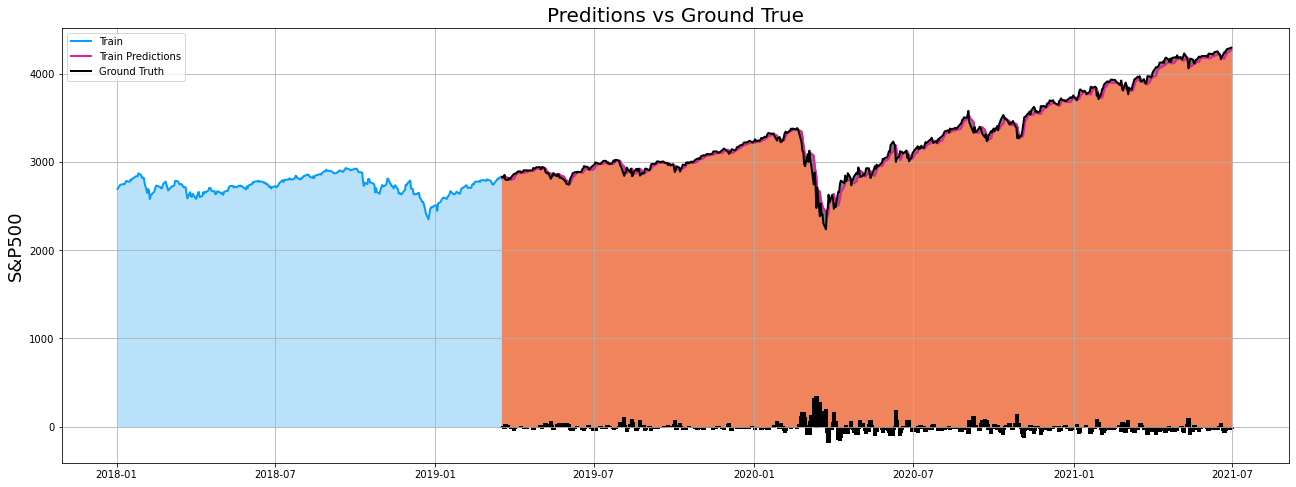

In [92]:
display_start_date = '2018-01-01'

train = data[:training_data_length + 1]
valid = data[training_data_length:]
valid.insert(1, 'Predictions', predictions, True)
valid.insert(1, 'Difference', valid['Predictions'] - valid['Close'], True)

valid = valid[valid.index > display_start_date]
train = train[train.index > display_start_date]

fig, ax1 = plt.subplots(figsize= (22, 8), sharex = True)
xt = train.index; 
yt = train[['Close']]

xv = valid.index;
yv = valid[['Close', 'Predictions']]

plt.title('Preditions vs Ground True', fontsize = 20)
plt.ylabel(stockname, fontsize = 18)
plt.plot(yt, color="#039dfc", linewidth=2.0)
plt.plot(yv["Predictions"], color="#E91D9E", linewidth=2.0)
plt.plot(yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Train Predictions", "Ground Truth"], loc="upper left")

# Fill between plotlines
ax1.fill_between(xt, 0, yt["Close"], color="#b9e1fa")
ax1.fill_between(xv, 0, yv["Predictions"], color="#F0845C")
ax1.fill_between(xv, yv["Close"], yv["Predictions"], color="grey") 

# Create the bar plot with the differences
x = valid.index
y = valid["Difference"]
plt.bar(x, y, width=5, color="black")
plt.grid()
plt.show()




In [1]:
price_quote = webreader.DataReader(symbol, data_source='yahoo', start=date_start, end=date_today)
new_df = price_quote.filter(['Close'])

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = mmscaler.transform(new_df[-100:].values)

# Create an empty list and Append past 100 days
X_test = []
X_test.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test)
pred_price = mmscaler.inverse_transform(pred_price)
date_tomorrow = date.today() + timedelta(days=1)
print('The price for ' + stockname + ' at ' + date_today + ' was: ' + str(round(df.at[df.index.max(), 'Close'])))
print('The predicted ' + stockname + ' price at date ' + str(date_tomorrow) + ' is: ' + str(round(pred_price[0, 0], 0)))

NameError: name 'webreader' is not defined